In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Kings XI Punjab') & ((df2['team2'] == 'Delhi Daredevils') | (df2['team2'] == 'Delhi Capitals'))]
match2 = df2[((df2['team1'] == 'Delhi Daredevils') | (df2['team1'] == 'Delhi Capitals')) & (df2['team2'] == 'Kings XI Punjab')]

Match1 = Punjab Home Ground

Match2 = Delhi Home Ground

# Overall Punjab vs Delhi:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season        city        date            team1             team2  \
119  120    2009   Cape Town  2009-04-19  Kings XI Punjab  Delhi Daredevils   
176  177    2010  Chandigarh  2010-03-13  Kings XI Punjab  Delhi Daredevils   
292  293    2011  Dharamsala  2011-05-15  Kings XI Punjab  Delhi Daredevils   
368  369    2012       Delhi  2012-05-15  Kings XI Punjab  Delhi Daredevils   
373  374    2012  Dharamsala  2012-05-19  Kings XI Punjab  Delhi Daredevils   

          toss_winner toss_decision  result  dl_applied            winner  \
119  Delhi Daredevils         field  normal           1  Delhi Daredevils   
176  Delhi Daredevils         field  normal           0  Delhi Daredevils   
292  Delhi Daredevils         field  normal           0   Kings XI Punjab   
368   Kings XI Punjab           bat  normal           0  Delhi Daredevils   
373  Delhi Daredevils         field  normal           0  Delhi Daredevils   

     win_by_runs  win_by_wickets player_of_match  \
119            0              10      DL Vettori   
176            0               5       G Gambhir   
292           29               0       PP Chawla   
368            0               5        UT Yadav   
373            0               6        UT Yadav   

                                            venue          umpire1  \
119                                      Newlands        MR Benson   
176    Punjab Cricket Association Stadium, Mohali      BR Doctrove   
292  Himachal Pradesh Cricket Association Stadium        Asad Rauf   
368                              Feroz Shah Kotla  HDPK Dharmasena   
373  Himachal Pradesh Cricket Association Stadium        BF Bowden   

          umpire2 umpire3  
119     SD Ranade     NaN  
176        S Ravi     NaN  
292    SL Shastri     NaN  
368  BNJ Oxenford     NaN  
373   VA Kulkarni     NaN

Matches played between Punjab and Delhi.

In [6]:
match.shape

(24, 18)

In [7]:
match['winner'].value_counts()

Kings XI Punjab     14
Delhi Daredevils     9
Delhi Capitals       1
Name: winner, dtype: int64

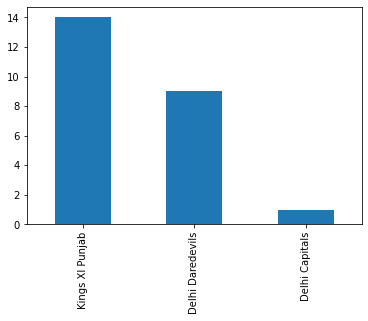

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Punjab won 14 times and Delhi won 10 times against each other.

In [9]:
match['toss_winner'].value_counts()

Delhi Daredevils    13
Kings XI Punjab      9
Delhi Capitals       2
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    18
bat       6
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Delhi Daredevils    6
Kings XI Punjab     6
Delhi Capitals      1
Name: winner, dtype: int64

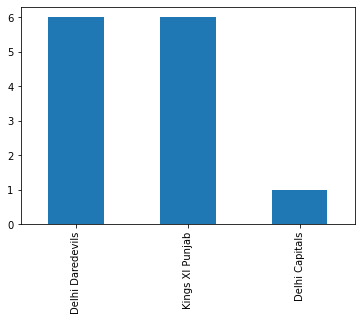

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Punjab won the toss and won the match 6 times whereas Delhi won 7 times. So winning toss doesn't have much affect to winning the match.

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning      batting_team     bowling_team  over  ball  \
3318        15       1  Delhi Daredevils  Kings XI Punjab     1     1   
3319        15       1  Delhi Daredevils  Kings XI Punjab     1     2   
3320        15       1  Delhi Daredevils  Kings XI Punjab     1     3   
3321        15       1  Delhi Daredevils  Kings XI Punjab     1     4   
3322        15       1  Delhi Daredevils  Kings XI Punjab     1     5   

        batsman  non_striker          bowler  is_super_over  ...  bye_runs  \
3318  SV Samson  SW Billings  Sandeep Sharma              0  ...         0   
3319  SV Samson  SW Billings  Sandeep Sharma              0  ...         0   
3320  SV Samson  SW Billings  Sandeep Sharma              0  ...         0   
3321  SV Samson  SW Billings  Sandeep Sharma              0  ...         0   
3322  SV Samson  SW Billings  Sandeep Sharma              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
3318            0            0             0             0           0   
3319            0            0             0             0           0   
3320            0            0             0             4           0   
3321            0            0             0             0           0   
3322            0            0             0             0           0   

      total_runs  player_dismissed dismissal_kind fielder  
3318           0               NaN            NaN     NaN  
3319           0               NaN            NaN     NaN  
3320           4               NaN            NaN     NaN  
3321           0               NaN            NaN     NaN  
3322           0               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Chennai and Rajasthan.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## KL Rahul's strike rate in first 6 overs:

In [15]:
strike_rate_list = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'KL Rahul') & (delivery['over'] <= 6)]['batsman_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'KL Rahul') & (delivery['over'] <= 6)]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = np.round((s/total_balls)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list.append(strike_rate)
print(strike_rate_list)

[153.33, 136.36, 133.33, 318.75]


KL Rahul played 4 innings being in Punjab against Delhi and these are his strike rates in first 6 overs.

In [16]:
avg_strike_rate = np.round(np.median(strike_rate_list),2)
avg_strike_rate

144.85

So KL Rahul's average strike rate is 144.85 against delhi in first 6 overs.

In [17]:
strike_rate_list_overall = []
total_ids1 = list(df1[df1['batsman'] == 'KL Rahul']['match_id'].unique())
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'KL Rahul') & (df1['over'] <= 6)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'KL Rahul') & (df1['over'] <= 6)]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = np.round((s/total_balls)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall.append(strike_rate)
print(strike_rate_list_overall)

[100.0, 133.33, 84.62, 130.77, 100.0, 125.0, 100.0, 62.5, 40.0, 100.0, 164.29, 70.0, 181.25, 125.0, 115.0, 185.71, 25.0, 200.0, 318.75, 178.57, 186.67, 94.12, 271.43, 153.33, 138.1, 117.65, 133.33, 108.0, 205.56, 146.67, 150.0, 72.73, 100.0, 20.0, 62.5, 136.36, 162.5, 75.0, 114.29, 92.31, 30.77, 133.33, 188.89, 120.83, 28.57, 256.52]


Kl Rahul's strike rate of every match he played in IPL in first 6 overs.

In [18]:
avg_strike_rate_overall = np.round(np.mean(strike_rate_list_overall),2)
avg_strike_rate_overall

126.94

So KL Rahul's average strike rate is 126.94 per match in IPL in first 6 overs till now.

In [19]:
strike_rate_list_overall_batting_first = []
total_ids1 = list(df1[df1['batsman'] == 'KL Rahul']['match_id'].unique())
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'KL Rahul') & (df1['over'] <= 6) & (df1['inning'] == 1)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'KL Rahul') & (df1['over'] <= 6) & (df1['inning'] == 1)]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = np.round((s/total_balls)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall_batting_first.append(strike_rate)
print(strike_rate_list_overall_batting_first)

[84.62, 130.77, 100.0, 125.0, 100.0, 40.0, 100.0, 164.29, 70.0, 125.0, 185.71, 25.0, 178.57, 186.67, 94.12, 153.33, 117.65, 146.67, 72.73, 100.0, 136.36, 114.29, 92.31, 30.77, 133.33, 28.57]


Kl Rahul's strike rate of every match he played in IPL in first 6 overs while batting first.

In [20]:
avg_strike_rate_overall_batting_first = np.round(np.mean(strike_rate_list_overall_batting_first),2)
avg_strike_rate_overall_batting_first

109.07

So KL Rahul's average strike rate is 109 per match in IPL in first 6 overs till now while batting first.

In [21]:
strike_rate_list_overall_batting_second = []
total_ids1 = list(df1[df1['batsman'] == 'KL Rahul']['match_id'].unique())
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'KL Rahul') & (df1['over'] <= 6) & (df1['inning'] == 2)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'KL Rahul') & (df1['over'] <= 6) & (df1['inning'] == 2)]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = np.round((s/total_balls)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall_batting_second.append(strike_rate)
print(strike_rate_list_overall_batting_second)

[100.0, 133.33, 62.5, 181.25, 115.0, 200.0, 318.75, 271.43, 138.1, 133.33, 108.0, 205.56, 150.0, 20.0, 62.5, 162.5, 75.0, 188.89, 120.83, 256.52]


Kl Rahul's strike rate of every match he played in IPL in first 6 overs while batting second.

In [22]:
avg_strike_rate_overall_batting_second = np.round(np.mean(strike_rate_list_overall_batting_second),2)
avg_strike_rate_overall_batting_second

150.17

So KL Rahul's average strike rate is 1150 per match in IPL in first 6 overs till now while batting first.

In [23]:
average_strike_rate = pd.Series([avg_strike_rate_overall,avg_strike_rate_overall_batting_first,avg_strike_rate_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_strike_rate.index , y = average_strike_rate)
plt.title('Average Strike Rate of KL Rahul in IPL')
plt.show()

So KL Rahul's Strike Rate is higher when he batted in second inning.

## Shreyas Iyer's contribution to DC's total score:

In [24]:
contribution_list = []
for j in ids:
    batsman_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'SS Iyer')]['batsman_runs'])
    total_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batting_team'] != 'Kings XI Punjab')]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    contribution = np.round((batsman/total)*100,2)
    if contribution > 0:
        contribution_list.append(contribution)
print(contribution_list)

[3.55, 45.38, 2.65, 39.19, 18.4, 34.46, 11.7, 8.96, 7.56]


So this is the distribution of Shreyas Iyer (in percentage) to his team Delhi against Punjab.

In [25]:
avg_contribution = np.round(np.mean(contribution_list),2)
avg_contribution

19.09

Shreyas Iyer scored 19.09% runs in average per match of total score of his team against Punajab.

In [26]:
contribution_list_overall = []
total_ids1 = list(df1[df1['batsman'] == 'SS Iyer']['match_id'].unique())
for j in total_ids1:
    batsman_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'SS Iyer')]['batsman_runs'])
    total_runs = list(df1[(df1['match_id'] == j) & ((df1['batting_team'] == 'Delhi Daredevils') | (df1['batting_team'] == 'Delhi Capitals'))]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    contribution = np.round((batsman/total)*100,2)
    if contribution > 0:
        contribution_list_overall.append(contribution)
print(contribution_list_overall)

[11.7, 15.48, 28.41, 4.69, 29.38, 8.96, 17.46, 6.54, 4.55, 48.73, 1.79, 21.19, 4.7, 21.74, 3.55, 35.93, 21.23, 43.68, 25.32, 45.38, 5.14, 12.5, 58.33, 10.7, 2.65, 11.59, 6.61, 7.56, 13.71, 2.94, 27.96, 39.19, 43.5, 6.31, 24.63, 26.51, 1.58, 18.62, 12.28, 3.23, 7.31, 11.69, 24.62, 18.4, 32.09, 44.51, 3.28, 29.27, 2.21, 34.46, 2.06, 26.94, 44.44, 11.9, 4.71, 9.03]


So this is the distribution of Shreyas Iyer (in percentage) to his team Delhi in IPL overall.

In [27]:
avg_contribution_overall = np.round(np.mean(contribution_list_overall),2)
avg_contribution_overall

18.62

Shreyas Iyer scored 18.62% runs in average per match of total score of his team overall in IPL.

In [28]:
contribution_list_overall_batting_first = []
total_ids1 = list(df1[df1['batsman'] == 'SS Iyer']['match_id'].unique())
for j in total_ids1:
    batsman_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'SS Iyer') & (df1['inning'] == 1)]['batsman_runs'])
    total_runs = list(df1[(df1['match_id'] == j) & ((df1['batting_team'] == 'Delhi Daredevils') | (df1['batting_team'] == 'Delhi Capitals')) & (df1['inning'] == 1)]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    if total > 0:
        contribution = np.round((batsman/total)*100,2)
    if contribution > 0 and contribution not in contribution_list_overall_batting_first:
        contribution_list_overall_batting_first.append(contribution)
print(contribution_list_overall_batting_first)

[11.7, 15.48, 29.38, 8.96, 1.79, 21.74, 35.93, 21.23, 43.68, 12.5, 10.7, 11.59, 6.61, 7.56, 27.96, 43.5, 24.63, 26.51, 1.58, 18.62, 12.28, 3.23, 7.31, 11.69, 32.09, 29.27, 26.94, 9.03]


So this is the distribution of Shreyas Iyer (in percentage) to his team Delhi in IPL overall while batting first.

In [29]:
avg_contribution_overall_batting_first = np.round(np.mean(contribution_list_overall_batting_first),2)
avg_contribution_overall_batting_first

18.34

Shreyas Iyer scored 18.34% runs in average per match of total score of his team overall in IPL while batting first.

In [30]:
contribution_list_overall_batting_second = []
total_ids1 = list(df1[df1['batsman'] == 'SS Iyer']['match_id'].unique())
for j in total_ids1:
    batsman_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'SS Iyer') & (df1['inning'] == 2)]['batsman_runs'])
    total_runs = list(df1[(df1['match_id'] == j) & ((df1['batting_team'] == 'Delhi Daredevils') | (df1['batting_team'] == 'Delhi Capitals')) & (df1['inning'] == 2)]['total_runs'])
    batsman = 0
    total = 0
    for i in batsman_runs:
        batsman += i
    for i in total_runs:
        total += i
    if total > 0:
        contribution = np.round((batsman/total)*100,2)
    if contribution > 0 and contribution not in contribution_list_overall_batting_second:
        contribution_list_overall_batting_second.append(contribution)
print(contribution_list_overall_batting_second)

[9.03, 28.41, 4.69, 17.46, 6.54, 4.55, 48.73, 21.19, 4.7, 3.55, 25.32, 45.38, 5.14, 58.33, 2.65, 13.71, 2.94, 39.19, 6.31, 23.81, 18.4, 44.51, 3.28, 2.21, 34.46, 2.06, 44.44, 11.9, 4.71]


So this is the distribution of Shreyas Iyer (in percentage) to his team Delhi in IPL overall while batting second.

In [31]:
avg_contribution_overall_batting_second = np.round(np.mean(contribution_list_overall_batting_second),2)
avg_contribution_overall_batting_second

18.54

Shreyas Iyer scored 18.54% runs in average per match of total score of his team overall in IPL while batting first.

In [32]:
average_contribution = pd.Series([avg_contribution_overall,avg_contribution_overall_batting_first,avg_contribution_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_contribution.index , y = average_contribution)
plt.title('Average Contribution of Shreyas Iyer to his team in IPL')
plt.show()

So Shreyas Iyer contributed more in the second inning for his team.

## KXIP bowlers wickets excluding Mohammad Shami in between 31st ball to 120th Ball:

In [33]:
total_matches_Punjab= list(delivery[(delivery['bowler'] == 'Mohammed Shami') & (delivery['bowling_team'] == 'Kings XI Punjab')]['match_id'].unique())
len(total_matches_Punjab)

2

Mohammad Shami joined Kings XI Punjab in 2019. So he only played two matches against Delhi.

In [34]:
total_wickets_Punjab = delivery[(delivery['match_id']).isin(total_matches_Punjab) & (delivery['bowler'] != 'Mohammed Shami') & (delivery['dismissal_kind'] != 'run out') & (delivery['over'] >=6) & (delivery['bowling_team'] == 'Kings XI Punjab')]['dismissal_kind'].count()
total_wickets_Punjab

8

Punjab took 8 wickets of Delhi in between 31st ball to 120th Ball excluding bowler Mohammad Shami.

In [35]:
avg_wickets_Punjab = total_wickets_Punjab/len(total_matches_Punjab)
avg_wickets_Punjab

4.0

So Punjab took 4 wickets of Delhi in an average per match in between 31st ball to 120th Ball excluding bowler Mohammad Shami. It's difficult to predict today's match as we have very less data.

In [36]:
total_matches_overall= list(df1[(df1['bowler'] == 'Mohammed Shami') & (df1['bowling_team'] == 'Kings XI Punjab')]['match_id'].unique())
len(total_matches_overall)

14

Mohammad shami played 14 matches for Punjab till now in IPL.

In [37]:
total_wickets_Punjab_overall = df1[(df1['match_id']).isin(total_matches_overall) & (df1['bowler'] != 'Mohammed Shami') & (df1['dismissal_kind'] != 'run out') & (df1['over'] >=6) & (df1['bowling_team'] == 'Kings XI Punjab')]['dismissal_kind'].count()
total_wickets_Punjab_overall

44

Punjab took 44 wickets in between 31st ball to 120th Ball excluding bowler Mohammad Shami.

In [38]:
avg_wickets_Punjab_overall = math.ceil(total_wickets_Punjab_overall/len(total_matches_overall))
avg_wickets_Punjab_overall

4

So Punjab took 4 wickets in an average per match in between 31st ball to 120th Ball excluding bowler Mohammad Shami in IPL.

## Status of Chris Gayle's batting during KXIP's inning (Out / Not Out, Strike Rate):

In [39]:
strike_rate_list = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'CH Gayle')]['batsman_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'CH Gayle')]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = np.round((s/total_balls)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list.append(strike_rate)
print(strike_rate_list)
print(len(delivery[delivery['player_dismissed'] == 'CH Gayle']))

[186.49]
1


Chris Gayle played only one match for Punjab against Delhi and scored runs with strike rate 186.49 and he got out. So from one match we cannot predict today's match.

In [40]:
strike_rate_list_overall = []
total_ids2 = list(df1[(df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab')]['match_id'].unique())
for j in total_ids2:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab')]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab')]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = np.round((s/total_balls)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall.append(strike_rate)
print(strike_rate_list_overall)
print('Number of matches Chris Gayle played for KXIP:',len(total_ids2))
print('Number of times Chris Gayle got out -',len(df1[(df1['player_dismissed'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab')]))

[193.94, 176.19, 165.79, 104.55, 145.0, 72.73, 100.0, 123.53, 128.57, 163.64, 193.62, 161.54, 170.83, 85.71, 114.29, 180.56, 164.06, 154.55, 186.49, 240.0, 133.33, 100.0, 117.86]
Number of matches Chris Gayle played for KXIP: 24
Number of times Chris Gayle got out - 20


These are the strike rates of Chis Gayle playing for Kings XI Punjab against all teams in IPL. And he got out 20 times out 24 times.

In [41]:
avg_strike_rate_overall = np.round(np.mean(strike_rate_list_overall),2)
avg_strike_rate_overall

146.82

Average strike rate of Chris Gayle is 146.82 against all teams in IPL.

In [42]:
strike_rate_list_overall_batting_first = []
total_ids2 = list(df1[(df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 1)]['match_id'].unique())
for j in total_ids2:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 1)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 1)]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = np.round((s/total_balls)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall_batting_first.append(strike_rate)
print(strike_rate_list_overall_batting_first)
print('Number of matches Chris Gayle played for KXIP:',len(total_ids2))
print('Number of times Chris Gayle got out -',len(df1[(df1['player_dismissed'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 1)]))

[193.94, 176.19, 145.0, 128.57, 193.62, 180.56, 164.06, 154.55, 186.49, 100.0]
Number of matches Chris Gayle played for KXIP: 11
Number of times Chris Gayle got out - 9


These are the strike rates of Chis Gayle playing for Kings XI Punjab against all teams in IPL while batting first. And he got out 9 times out 11 times while batting in first inning..

In [43]:
avg_strike_rate_overall_batting_first = np.round(np.mean(strike_rate_list_overall_batting_first),2)
avg_strike_rate_overall_batting_first

162.3

Average strike rate of Chris Gayle is 162.3 against all teams in IPL while batting first.

In [44]:
strike_rate_list_overall_batting_second = []
total_ids2 = list(df1[(df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 2)]['match_id'].unique())
for j in total_ids2:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 2)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 2)]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = np.round((s/total_balls)*100,2)
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall_batting_second.append(strike_rate)
print(strike_rate_list_overall_batting_second)
print('Number of matches Chris Gayle played for KXIP:',len(total_ids2))
print('Number of times Chris Gayle got out -',len(df1[(df1['player_dismissed'] == 'CH Gayle') & (df1['batting_team'] == 'Kings XI Punjab') & (df1['inning'] == 2)]))

[165.79, 104.55, 72.73, 100.0, 123.53, 163.64, 161.54, 170.83, 85.71, 114.29, 240.0, 133.33, 117.86]
Number of matches Chris Gayle played for KXIP: 13
Number of times Chris Gayle got out - 11


These are the strike rates of Chis Gayle playing for Kings XI Punjab against all teams in IPL while batting second. And he got out 11 times out 13 times while batting in second inning..

In [45]:
avg_strike_rate_overall_batting_second = np.round(np.mean(strike_rate_list_overall_batting_second),2)
avg_strike_rate_overall_batting_second

134.91

Average strike rate of Chris Gayle is 134.91 against all teams in IPL while batting second.

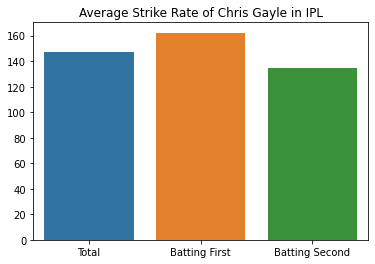

In [46]:
average_strike_rate = pd.Series([avg_strike_rate_overall,avg_strike_rate_overall_batting_first,avg_strike_rate_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_strike_rate.index , y = average_strike_rate)
plt.title('Average Strike Rate of Chris Gayle in IPL')
plt.show()

So Chris Gayle's Strike Rate is higher when he batted in first inning.